<a href="https://colab.research.google.com/github/piltom/materia_machinelearning/blob/main/tp3_solucion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio 3.1


Genero los datos

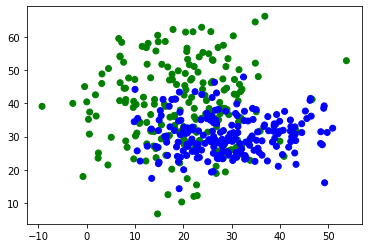

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def gendataset(nmuestras, mx1, vx1, my1, vy1, mx2, vx2, my2, vy2):
  xa = pd.Series(np.random.normal(loc= mx1, scale=vx1, size=nmuestras))
  ya = pd.Series(np.random.normal(loc= my1, scale=vy1, size=nmuestras))
  xb = pd.Series(np.random.normal(loc= mx2, scale=vx2, size=nmuestras))
  yb = pd.Series(np.random.normal(loc= my2, scale=vy2, size=nmuestras))

  a_df = pd.DataFrame({'target':'A','x':xa,'y':ya, 'color':'g'})
  b_df = pd.DataFrame({'target':'B','x':xb,'y':yb, 'color':'b'})
  comb=pd.concat([a_df,b_df],ignore_index= True,axis=0)
  plt.scatter(comb.x,comb.y, c=comb.color)
  return comb
combined_df=gendataset(200, 20,10,40,13,30,10,30,6)


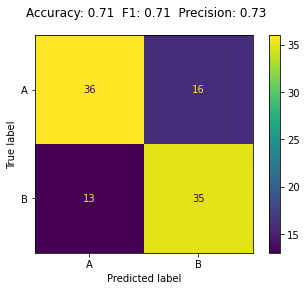

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as skm

def ejercicio1(current_df, testsize,k):
  X_train, X_test, y_train, y_test = train_test_split(current_df[['x','y']], current_df.target, test_size=testsize, random_state=42)

  kneighbors_clasif= KNeighborsClassifier(n_neighbors=k)
  kneighbors_clasif.fit(X_train, y_train)
  fig=skm.plot_confusion_matrix(kneighbors_clasif, X_test, y_test)
  accu=skm.accuracy_score(y_test, kneighbors_clasif.predict(X_test))
  f1=skm.f1_score(y_test, kneighbors_clasif.predict(X_test), pos_label="A")
  prec=skm.precision_score(y_test, kneighbors_clasif.predict(X_test),pos_label="A")
  fig.figure_.suptitle("Accuracy: %.2f  F1: %.2f  Precision: %.2f" % (accu, f1, prec))

ejercicio1(combined_df, 100,10)

Mismos centroides y varianzas, N=50 (mitad de antes):

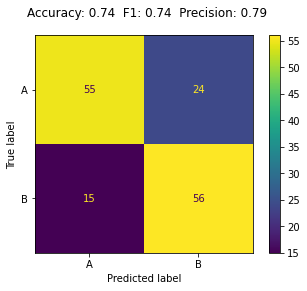

In [3]:
ejercicio1(combined_df, 150, 10)

Las métricas pueden empeorar o mejorar, depende del dataset que se haya generado ya que puede dar la casualidad de que justo agarre un set de entrenamiento que funcione mejor que otro.

Mismos centroides y varianzas, N=100, k=3 luego k=25:

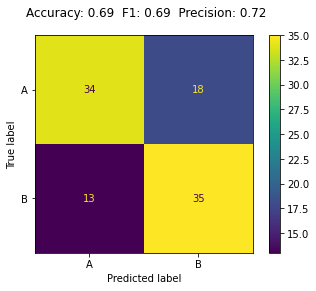

In [4]:
ejercicio1(combined_df, 100, 3)


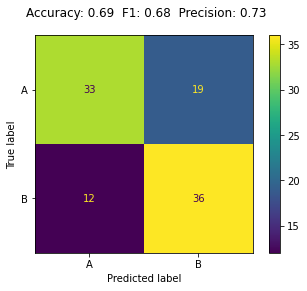

In [5]:
ejercicio1(combined_df, 100, 40)

Ahora creando un nuevo dataset mas homogeneo, usando N=100 y k=10

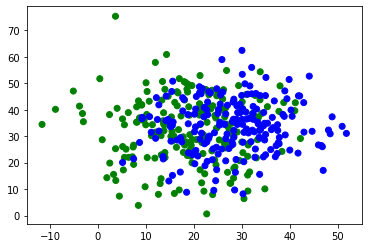

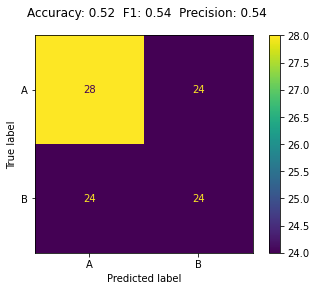

In [6]:
#           muestras, mx1,vx1, my1, vy1, mx2, vx2, my2, vy2
nset=gendataset(200, 20, 10,  33,  13,   27,  10, 33,  10)
ejercicio1(nset, 100, 10)

Agregando más dimensiones no debería cambiar mucho, salvo por volverse mas difícil de visualizar el scatter.

# Ejercicio 3.2: KFold y GridSearch


Utilizando KFold para obtener distintos modelos con distintos sets de entrenamiento y test:

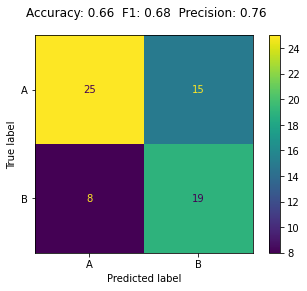

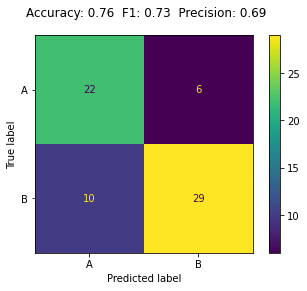

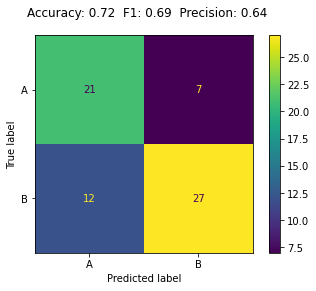

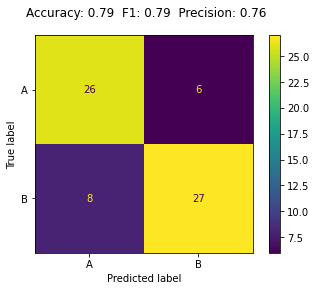

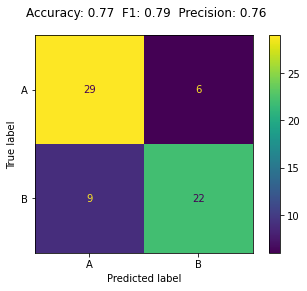

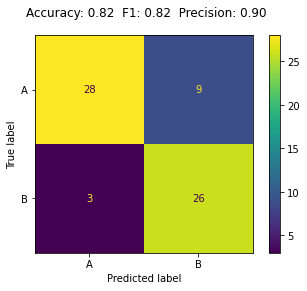

In [7]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=6, shuffle=True)
X=combined_df[['x','y']].values
y=combined_df['target']
for train_index, test_index in kf.split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  kneighbors_clasif= KNeighborsClassifier(n_neighbors=10)
  kneighbors_clasif.fit(X_train, y_train)
  fig=skm.plot_confusion_matrix(kneighbors_clasif, X_test, y_test)
  accu=skm.accuracy_score(y_test, kneighbors_clasif.predict(X_test))
  f1=skm.f1_score(y_test, kneighbors_clasif.predict(X_test), pos_label="A")
  prec=skm.precision_score(y_test, kneighbors_clasif.predict(X_test),pos_label="A")
  fig.figure_.suptitle("Accuracy: %.2f  F1: %.2f  Precision: %.2f" % (accu, f1, prec))

Usando GridSearchCV para probar diferentes K, los scores son:


In [8]:
from sklearn.model_selection import GridSearchCV

f1_scorer = skm.make_scorer(skm.f1_score, pos_label="A")
prec_scorer=skm.make_scorer(skm.precision_score, pos_label="B")
knb=KNeighborsClassifier()
X_train, X_test, y_train, y_test = train_test_split(combined_df[['x','y']], combined_df.target, test_size=100, random_state=42)
k_list=[3,6,12,18,24,30]
clf = GridSearchCV(knb, {'n_neighbors':k_list}, scoring={'accuracy':skm.make_scorer(skm.accuracy_score), 'f1':f1_scorer, 'precision':prec_scorer}, refit=False)
clf.fit(X_train, y_train)
for el in zip(k_list,clf.cv_results_['mean_test_accuracy'], clf.cv_results_['mean_test_f1'], clf.cv_results_['mean_test_precision']):
  print('K: %d Accuracy: %.3f F1: %.3f Precision: %.3f' % el)


K: 3 Accuracy: 0.717 F1: 0.701 Precision: 0.721
K: 6 Accuracy: 0.740 F1: 0.726 Precision: 0.744
K: 12 Accuracy: 0.760 F1: 0.738 Precision: 0.741
K: 18 Accuracy: 0.750 F1: 0.724 Precision: 0.734
K: 24 Accuracy: 0.753 F1: 0.722 Precision: 0.724
K: 30 Accuracy: 0.773 F1: 0.739 Precision: 0.733


# Ejercicio 3.3

Cargo los datos y describo por separado las canciones gustadas y no gustadas.

In [9]:
attributes_spotify = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBOM/data/attributes_spotify.csv")
attributes_spotify[attributes_spotify['target']==1].describe()


,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.0
mean,509.500000,0.154279,0.646547,258197.574510,0.689826,0.174486,5.463725,0.194895,-7.353329,0.577451,0.106354,122.519382,3.978431,0.523186,1.0
std,294.592939,0.218645,0.163108,91441.699498,0.175084,0.297779,3.668776,0.162592,2.896032,0.494207,0.101148,25.376196,0.220459,0.247271,0.0
min,0.000000,0.000003,0.122000,52006.000000,0.031000,0.000000,0.000000,0.018800,-25.756000,0.000000,0.023100,64.992000,3.000000,0.035900,1.0
25%,254.750000,0.008558,0.553500,202116.750000,0.572000,0.000001,2.000000,0.092075,-8.828500,0.000000,0.040275,104.992250,4.000000,0.322000,1.0
50%,509.500000,0.049050,0.670500,238256.500000,0.708000,0.002380,6.000000,0.129500,-6.948000,1.000000,0.058800,122.030500,4.000000,0.530000,1.0
75%,764.250000,0.208750,0.767250,289277.000000,0.832250,0.204250,9.000000,0.256000,-5.306500,1.000000,0.131250,136.034250,4.000000,0.717000,1.0
max,1019.000000,0.990000,0.962000,849960.000000,0.989000,0.968000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.0


In [10]:
attributes_spotify[attributes_spotify['target']==0].describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,997.000000,997.000000,997.000000,9.970000e+02,997.000000,997.000000,997.000000,997.00000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.0
mean,1518.000000,0.221670,0.589648,2.341405e+05,0.673138,0.091135,5.218656,0.18670,-6.811743,0.647944,0.078659,120.666027,3.957874,0.469836,0.0
std,287.953411,0.292590,0.153714,6.896629e+04,0.240815,0.238319,3.624760,0.14776,4.462326,0.477851,0.074261,27.943550,0.287334,0.244311,0.0
min,1020.000000,0.000005,0.152000,1.604200e+04,0.014800,0.000000,0.000000,0.02190,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.0
25%,1269.000000,0.010900,0.487000,1.991110e+05,0.549000,0.000000,2.000000,0.09290,-7.577000,0.000000,0.035300,98.972000,4.000000,0.262000,0.0
50%,1518.000000,0.079300,0.598000,2.227330e+05,0.723000,0.000003,5.000000,0.12300,-5.535000,1.000000,0.049100,120.013000,4.000000,0.466000,0.0
75%,1767.000000,0.302000,0.697000,2.523600e+05,0.861000,0.002090,8.000000,0.23600,-4.251000,1.000000,0.091100,138.858000,4.000000,0.655000,0.0
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.92400,-0.787000,1.000000,0.622000,203.822000,5.000000,0.974000,0.0


In [11]:
attributes_spotify

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,4.0,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise
2013,2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.1310,110.041,4.0,0.867,0,Candy,Dillon Francis
2014,2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.1070,150.082,4.0,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man
2015,2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.1330,150.011,4.0,0.623,0,First Contact,Twin Moons


Algunos de estos parametros interesantes son:
* Instrumentalness: This value represents the amount of vocals in the song. The closer it is to 1.0, the more instrumental the song is.
* Acousticness: This value describes how acoustic a song is. A score of 1.0 means the song is most likely to be an acoustic one.
* Liveness: This value describes the probability that the song was recorded with a live audience. According to the official documentation “a value above 0.8 provides strong likelihood that the track is live”.
* Speechiness: “Speechiness detects the presence of spoken words in a track”. If the speechiness of a song is above 0.66, it is probably made of spoken words, a score between 0.33 and 0.66 is a song that may contain both music and words, and a score below 0.33 means the song does not have any speech.
* Energy: “(energy) represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy”.
* Danceability: “Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable”.
* Valence: “A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)”.

Mi proposición sería intentar realizar un K-neighbors con un indicador que calcule que tan "de fiesta" es la cancion, más un par de colmunas más para refinar la selección.

El nuevo parámetro "party" se calcula como un promedio de la bailabilidad de la canción y la energía, multiplicado por que tan no acústica es.


Text(0.5, 0.98, 'Accuracy: 0.73  F1: 0.71  Precision: 0.77')

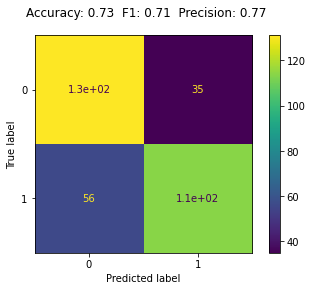

In [30]:
attributes_spotify['party']=(attributes_spotify['danceability']+attributes_spotify['energy'])/2*(1-attributes_spotify['acousticness'])

Para encontrar qué otras características usar, se seleccionaron algunas de las tablas graficadas con anterioridad observando su media, desvío y percentiles, evaluando las diferencias entre el set gustado y el no gustado. Luego se fueron quitando por turnos manualmente, probando si mejoraba u empeoraba el resultado. Este proceso podría haberse hecho automático tomando las keys del dataset y seleccionando algunas aleatoriamente. 

Finalmente se tomaron las características elegidas y se probaron varios K-neighbors utilizando un K-fold. Se eligió el resultado con el mejor promedio de precisión, exactitud y f1.

Text(0.5, 0.98, 'Accuracy: 0.71  F1: 0.70  Precision: 0.80')

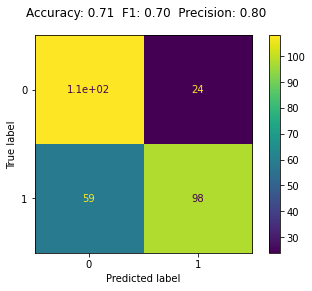

In [53]:
X=attributes_spotify[['party','instrumentalness','loudness','speechiness', 'liveness']].values
y=attributes_spotify['target']
best_ave=0
kf = KFold(n_splits=7, shuffle=True)
for train_index, test_index in kf.split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  kneighbors_clasif= KNeighborsClassifier(n_neighbors=40)
  kneighbors_clasif.fit(X_train, y_train)
  accu=skm.accuracy_score(y_test, kneighbors_clasif.predict(X_test))
  f1=skm.f1_score(y_test, kneighbors_clasif.predict(X_test))
  prec=skm.precision_score(y_test, kneighbors_clasif.predict(X_test))
  sc_mean=f1
  if sc_mean>best_ave:
    best_ave=sc_mean
    best_set_idx=train_index
    test_set_idx=test_index

kneighbors_clasif= KNeighborsClassifier(n_neighbors=40)
kneighbors_clasif.fit(X[best_set_idx], y[best_set_idx])
fig=skm.plot_confusion_matrix(kneighbors_clasif, X[test_set_idx], y[test_set_idx])
accu=skm.accuracy_score(y[test_set_idx], kneighbors_clasif.predict(X[test_set_idx]))
f1=skm.f1_score(y[test_set_idx], kneighbors_clasif.predict(X[test_set_idx]))
prec=skm.precision_score(y[test_set_idx], kneighbors_clasif.predict(X[test_set_idx]))
fig.figure_.suptitle("Accuracy: %.2f  F1: %.2f  Precision: %.2f" % (accu, f1, prec))

También se probaron otras características "compuestas" como que tan cerca está la canción de 3 minutos, que tan larga y aburrida es, etc. Esos indicadores no dieron tan buenos resultados como el indicador "party".
## Conclusión para resultados
Si bien una exactitud (accuracy) del 71% no es impresionante, para un sistema de recomendación de música creería que es aceptable. No es de vital importancia mostrar absolutamente todas las canciones que le pueden gustar al usuario, es más importante no mostrarle canciones que lo hagan cerrar la app (relacionado a la precisión). La precisión de 80% obtenida significaría que aproximadamente 4 de cada 5 canciones que se le muestran al usuario le gustan. Para un clasificador tan simple, creería que se trata de un buen número.